In [92]:
import visa
import numpy as np
import matplotlib.pyplot as plt
import time
from visa import constants as viCon

rm = visa.ResourceManager()

scope = rm.open_resource('USB0::0x0957::0x179B::MY51250109::0::INSTR')
scope.enable_event(viCon.EventType.service_request,viCon.VI_QUEUE)

In [93]:
scope.write("*SRE 0") #Service requests on triggers
# The WORD format is the most accurate for Keysight Oscilloscopes. Data is transferred as signed 16bit integers in 2 bytes.
scope.write(":WAV:SOUR MATH")
scope.write(":WAV:FORMAT WORD")
scope.write(":WAV:BYTEORDER MSBF") # Set the byte order to Big-Endian (default for Infinium oscilloscopes)
scope.read_termination = None # Since we're transferring binary data we need to remove the newline read termination

start = time.perf_counter()
wfm_array = scope.query_binary_values(":WAV:DATA?", 'h', is_big_endian = True, container = np.array)
wfm_to_array_ints_time = time.perf_counter()-start
print("Time to grab binary wfm & convert to array of integers: "+str(wfm_to_array_ints_time))
y_inc = float(scope.query(":WAV:YINC?"))
print(y_inc)
y_or = float(scope.query(":WAV:YOR?"))
print(y_or)
y_ref = float(scope.query(":WAV:YREF?"))
print(y_ref)
wfm_array = (wfm_array-y_ref)*y_inc + y_or
wfm_to_array_floats_time = time.perf_counter()-start
print("Time to grab binary wfm, convert to array of floats: "+str(wfm_to_array_floats_time))
print("Check size of wfm array :"+str(len(wfm_array)))
plt.plot(wfm_array)
 

Time to grab binary wfm & convert to array of integers: 0.3691151000002719
6.103516e-06
0.18876
32768.0
Time to grab binary wfm, convert to array of floats: 0.3796765000006417
Check size of wfm array :7680
Time to grab binary wfm & convert to array of integers: 0.4673179000001255
6.103516e-06
0.18876
32768.0
Time to grab binary wfm, convert to array of floats: 0.47747789999993984
Check size of wfm array :7680
Time to grab binary wfm & convert to array of integers: 0.47548600000027363
6.103516e-06
0.18876
32768.0
Time to grab binary wfm, convert to array of floats: 0.4859292999999525
Check size of wfm array :7680
Time to grab binary wfm & convert to array of integers: 0.1307434000000285
6.103516e-06
0.18876
32768.0
Time to grab binary wfm, convert to array of floats: 0.14110509999954957
Check size of wfm array :7680
Time to grab binary wfm & convert to array of integers: 0.32642629999918427
6.103516e-06
0.18876
32768.0
Time to grab binary wfm, convert to array of floats: 0.3374654999997

KeyboardInterrupt: 

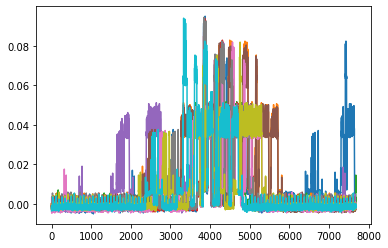

In [94]:
while(1):
    scope.write("*CLS") #Clearing the trigger register. Important!
    scope.assert_trigger()
    scope.wait_on_event(viCon.EventType.service_request,1000000)

    start = time.perf_counter()
    wfm_array = scope.query_binary_values(":WAV:DATA?", 'h', is_big_endian = True, container = np.array)
    wfm_to_array_ints_time = time.perf_counter()-start
    print("Time to grab binary wfm & convert to array of integers: "+str(wfm_to_array_ints_time))
    y_inc = float(scope.query(":WAV:YINC?"))
    y_or = float(scope.query(":WAV:YOR?"))
    y_ref = float(scope.query(":WAV:YREF?"))
    wfm_array = (wfm_array-y_ref)*y_inc + y_or
    wfm_to_array_floats_time = time.perf_counter()-start
    print("Time to grab binary wfm, convert to array of floats: "+str(wfm_to_array_floats_time))
    print("Check size of wfm array :"+str(len(wfm_array)))

In [ ]:
x_inc = float(scope.query(":WAV:XINC?"))
x_inc*len(wfm_array)
print((wfm_array.max()-wfm_array.min())*1000)



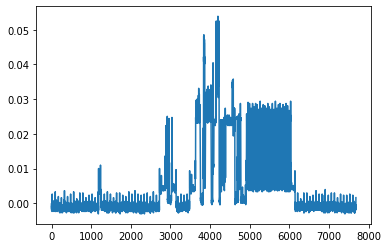

In [141]:
resistance = 1.5 #ohm
current_array = wfm_array/resistance
plt.plot(current_array)

In [142]:
idleStd = wfm_array[0:1000].std()
idleMean = wfm_array[0:1000].mean()

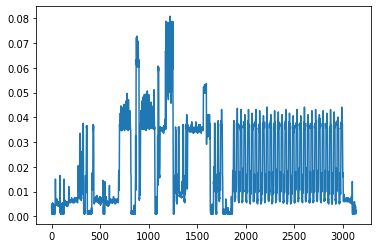

In [143]:
filtered = wfm_array[wfm_array >  (idleMean + 2*idleStd)]
plt.plot(filtered)

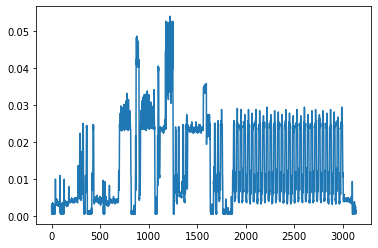

In [144]:
current_array=filtered/resistance
plt.plot(current_array)

In [145]:
current_array.sum()/(x_inc*len(current_array))

105.4151027107109

0.053899891413333345